# EnKF Experiments - GCS benchmark

## Imports

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.stats import shapiro, kruskal
import seaborn as sns
import sys

In [2]:
# Local
from experiment_utils import Modeller, Processor, Visualiser

sys.path.append('../../stationsim/')
from ensemble_kalman_filter import EnsembleKalmanFilter, AgentIncluder
from stationsim_gcs_model import Model

In [3]:
%matplotlib inline
np.random.seed(42)

## Functions

In [4]:
def tidy_dataframe(df, independent_col: str, dependent_cols: list):
    output = list()
    
    for i, row in df.iterrows():
        for col in dependent_cols:
            d = {independent_col: row[independent_col],
                 'variable':  col,
                 'value': row[col]}
            output.append(d)
    
    output = pd.DataFrame(output)
    return output

## Data paths

In [5]:
data_dir = './results/data/'
gcs_model_baseline_dir = data_dir + 'gcs_model_baseline/'
gcs_model_1_dir = data_dir + 'gcs_model_exp_1/'

In [6]:
fig_dir = './results/figures/gcs_model/'

In [7]:
model_dir = './results/models/'

## Experiment 0 - Baseline

### Run experiment

#### Benchmark

In [8]:
# Modeller.run_enkf_benchmark()

#### Collisions

In [9]:
# Modeller.run_model_collisions()

### Analysis

#### Benchmark

In [10]:
with open(model_dir + 'baseline.pkl', 'rb') as f:
    baseline_filter = pickle.load(f)

baseline_results = pd.DataFrame(baseline_filter.forecast_error)
baseline_results.head()

,time,forecast
0,0,0.000000
1,1,4.231874
2,2,4.230845
3,3,4.229816
4,4,4.228786


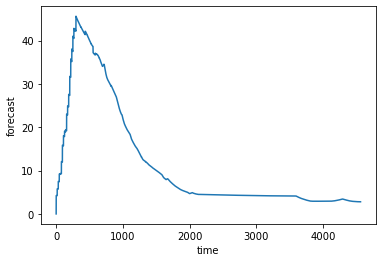

In [11]:
plt.figure()
sns.lineplot(x='time', y='forecast', data=baseline_results)
plt.savefig(fig_dir + 'baseline_errors_10.pdf')
plt.show()

#### Collisions

In [34]:
collisions = pd.read_csv(data_dir + 'model_collisions.csv')
collisions.head()

,Unnamed: 0,collisions,population_size
0,0,13,5
1,1,4,5
2,2,1,5
3,3,11,5
4,4,65,5


In [35]:
if 'Unnamed: 0' in collisions.columns:
    collisions = collisions.drop('Unnamed: 0', axis=1)

In [36]:
collisions.head()

,collisions,population_size
0,13,5
1,4,5
2,1,5
3,11,5
4,65,5


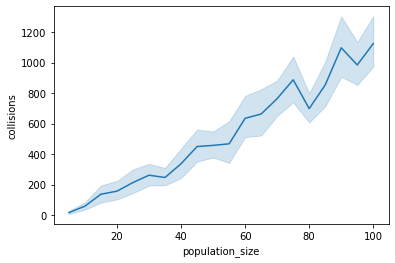

In [37]:
plt.figure()
sns.lineplot(x='population_size', y='collisions', data=collisions)
plt.savefig(fig_dir + 'baseline_collisions.pdf')
plt.show()